# eBay Scraper and EDA for iPhone Prices From Past Auctions

In this notebook we will be looking though some data I have scraped from eBay concerning the price of iPhones that were sold on the online auction website eBay. All of these samples were produced using the HTML session script that I wrote to parse out data from a custom eBay search I did. 

The code for that will be below before I start separating out the data, cleaning it and having a look into some EDA. 

The main things I would like to know from this dataset are: 

1. What is the typical cost of a specific kind of iPhone? 

2. What is the variation around this price? 

3. How quickly does the value of an iPhone fall when new generations are released

4. Is price variance similar across all models

5. Does the memory or buying format of the item have as much of an impact on the value as the generation of iPhone

6. Are iPhones cheaper when bought at auction or at buy it now? (This will require a second web scrape) 

7. Does it make sense to buy an iPhone from another country and pay to have it shipped (including import taxes) to the UK? (This will also require a separate scrape.

8. Is the value of a certain iPhone changing over time? 

One approach could be to write the scraper as a free standing program which I give inputs. However because the custom nature of the search URL I feel it is easier to have it here each time. 

In [24]:
from requests_html import HTMLSession
import pandas as pd
from tqdm import tqdm

s = HTMLSession()
def ebay_scraper():
    data2 = []
    keyword = input('Search term: ')
    pages = int(input('Number of pages of results to analyse: '))
    urls = ["https://www.ebay.co.uk/sch/i.html?_fsrp=1&rt=nc&_from=R40&_nkw={}&_sacat=0&LH_Sold=1&LH_Auction=1&_pgn={}".format(keyword,x)for x in range (1,pages)]
    for url in tqdm(urls):
        request = s.get(url)

        content = request.html.find('div.s-item__info.clearfix')
        for items in content:
            price = items.find('span.s-item__price', first=True).text
            title = items.find('h3.s-item__title', first=True).text
            subtitle = items.find('div.s-item__subtitle', first=True).text
            try:
                item_location = items.find('span.s-item__location.s-item__itemLocation', first=True).text
            except:
                item_location = 'UK'
            try:
                bids = items.find('span.s-item__bids.s-item__bidCount', first=True).text
            except:
                bids = 'N/A'
            try:
                date_sold = items.find('div.s-item__title--tagblock', first=True).text.rstrip("Sold item").lstrip("Sold Item").lstrip('Sold Item').rstrip("Sold I")
            except:
                date_sold = 'N/A'

            data2.append([price,title,subtitle,bids,date_sold])

    df = pd.DataFrame(data2, columns = ['Price','Title','Subtitle','Bids','Date_Sold'])
    df.to_csv(f'{keyword}_eBay_scrape.csv')
    return df


In [25]:
df1 = ebay_scraper()

Search term: iPhone12 
Number of pages of results to analyse: 100


100%|███████████████████████████████████████████| 99/99 [02:07<00:00,  1.29s/it]


In [26]:
df1

,Price,Title,Subtitle,Bids,Date_Sold
0,$20.00,Shop on eBay,Brand New,N/A,N/A
1,£341.01,Apple iPhone 12 - 64GB - Blue (Unlocked) - Fas...,Pre-owned,8 bids,1 Aug 2022
2,£585.00,Apple iPhone 12 Pro Max - 128GB - Pacific Blue...,Pre-owned,10 bids,1 Aug 2022
3,£285.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB UNLOCKED...,Parts only,32 bids,1 Aug 2022
4,£660.00,iPhone 12 Pro Max 512 GB Pacific Blue,Pre-owned,4 bids,1 Aug 2022
...,...,...,...,...,...
5788,£689.00,Apple iPhone 12 Pro Max - 256GB - Pacific Blue...,Pre-owned,3 bids,3 May 2022
5789,£350.00,Apple iPhone 12 mini - 64GB - Midnight Blue (U...,Pre-owned,54 bids,3 May 2022
5790,£340.00,Apple iPhone 12 - 64GB - Black (Unlocked),Pre-owned,1 bid,3 May 2022
5791,£104.00,Apple iPhone 12 SPARES & REPAIRS 64GB Black Un...,Parts only,19 bids,3 May 2022


In [27]:
df2 = df1[df1["Price"].str.contains("£")].copy()
prices = df2["Price"].str.lstrip("£")
prices = prices.str.replace(',','')
df2["Price"] = prices
df2['Price'] = df2.Price.astype(float)  
df2

,Price,Title,Subtitle,Bids,Date_Sold
1,341.01,Apple iPhone 12 - 64GB - Blue (Unlocked) - Fas...,Pre-owned,8 bids,1 Aug 2022
2,585.00,Apple iPhone 12 Pro Max - 128GB - Pacific Blue...,Pre-owned,10 bids,1 Aug 2022
3,285.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB UNLOCKED...,Parts only,32 bids,1 Aug 2022
4,660.00,iPhone 12 Pro Max 512 GB Pacific Blue,Pre-owned,4 bids,1 Aug 2022
5,351.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB SMARTPHO...,Parts only,25 bids,1 Aug 2022
...,...,...,...,...,...
5788,689.00,Apple iPhone 12 Pro Max - 256GB - Pacific Blue...,Pre-owned,3 bids,3 May 2022
5789,350.00,Apple iPhone 12 mini - 64GB - Midnight Blue (U...,Pre-owned,54 bids,3 May 2022
5790,340.00,Apple iPhone 12 - 64GB - Black (Unlocked),Pre-owned,1 bid,3 May 2022
5791,104.00,Apple iPhone 12 SPARES & REPAIRS 64GB Black Un...,Parts only,19 bids,3 May 2022


In [28]:
# Checking the standard deviation of prices that match these criteria
# It's pretty large!
df2.Price.std()


178.09082719794057

In [29]:
pd.options.display.max_rows = 999
df3 = df2[~df2["Title"].str.contains("Faulty | 11 | 13 ")]
df3



,Price,Title,Subtitle,Bids,Date_Sold
1,341.01,Apple iPhone 12 - 64GB - Blue (Unlocked) - Fas...,Pre-owned,8 bids,1 Aug 2022
2,585.00,Apple iPhone 12 Pro Max - 128GB - Pacific Blue...,Pre-owned,10 bids,1 Aug 2022
3,285.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB UNLOCKED...,Parts only,32 bids,1 Aug 2022
4,660.00,iPhone 12 Pro Max 512 GB Pacific Blue,Pre-owned,4 bids,1 Aug 2022
5,351.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB SMARTPHO...,Parts only,25 bids,1 Aug 2022
...,...,...,...,...,...
5788,689.00,Apple iPhone 12 Pro Max - 256GB - Pacific Blue...,Pre-owned,3 bids,3 May 2022
5789,350.00,Apple iPhone 12 mini - 64GB - Midnight Blue (U...,Pre-owned,54 bids,3 May 2022
5790,340.00,Apple iPhone 12 - 64GB - Black (Unlocked),Pre-owned,1 bid,3 May 2022
5791,104.00,Apple iPhone 12 SPARES & REPAIRS 64GB Black Un...,Parts only,19 bids,3 May 2022


This now actually looks pretty good as a cleaned up dataset that we can actually work on. We need to tweak the datetime problably and will need to get dummies and scale if we want any precidtive regression models.

In [30]:
df4 = df3.copy()
df4['Date_Sold'] = pd.to_datetime(df4['Date_Sold'])
df4


,Price,Title,Subtitle,Bids,Date_Sold
1,341.01,Apple iPhone 12 - 64GB - Blue (Unlocked) - Fas...,Pre-owned,8 bids,2022-08-01
2,585.00,Apple iPhone 12 Pro Max - 128GB - Pacific Blue...,Pre-owned,10 bids,2022-08-01
3,285.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB UNLOCKED...,Parts only,32 bids,2022-08-01
4,660.00,iPhone 12 Pro Max 512 GB Pacific Blue,Pre-owned,4 bids,2022-08-01
5,351.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB SMARTPHO...,Parts only,25 bids,2022-08-01
...,...,...,...,...,...
5788,689.00,Apple iPhone 12 Pro Max - 256GB - Pacific Blue...,Pre-owned,3 bids,2022-05-03
5789,350.00,Apple iPhone 12 mini - 64GB - Midnight Blue (U...,Pre-owned,54 bids,2022-05-03
5790,340.00,Apple iPhone 12 - 64GB - Black (Unlocked),Pre-owned,1 bid,2022-05-03
5791,104.00,Apple iPhone 12 SPARES & REPAIRS 64GB Black Un...,Parts only,19 bids,2022-05-03


Now that we have all the data well cleaned and in a format we are interested in we can start doing sensible things like removing outliers. For this we will use a z-score of 3 or more to remove outliers. 

In [35]:
# First we will create a zscore column
df4["z_score_price"] = (df4.Price - df4.Price.mean())/df4.Price.std()
# Then we will filter based on zscore for prices
df5 = df4[df4["z_score_price"].between(-1.5,1.5)]
df5

# Here we chose a z score filter of 1.5 standard deviations either side of the mean 
# This is because we don't expect the price of a well defined commodity to vary that much
# I still haven't split the dataset into different RAM options yet



,Price,Title,Subtitle,Bids,Date_Sold,z_score_price
1,341.01,Apple iPhone 12 - 64GB - Blue (Unlocked) - Fas...,Pre-owned,8 bids,2022-08-01,-0.430851
2,585.00,Apple iPhone 12 Pro Max - 128GB - Pacific Blue...,Pre-owned,10 bids,2022-08-01,0.969801
3,285.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB UNLOCKED...,Parts only,32 bids,2022-08-01,-0.752383
4,660.00,iPhone 12 Pro Max 512 GB Pacific Blue,Pre-owned,4 bids,2022-08-01,1.400347
5,351.00,DAMAGED APPLE iPHONE 12 PRO MAX 128GB SMARTPHO...,Parts only,25 bids,2022-08-01,-0.373502
...,...,...,...,...,...,...
5786,310.00,Apple iPhone 12 - 128GB - Purple (Unlocked),Brand new,7 bids,2022-05-03,-0.608867
5787,598.00,Apple iPhone 12 Pro Max - 256GB - Pacific Blue...,Pre-owned,21 bids,2022-05-03,1.044429
5789,350.00,Apple iPhone 12 mini - 64GB - Midnight Blue (U...,Pre-owned,54 bids,2022-05-03,-0.379243
5790,340.00,Apple iPhone 12 - 64GB - Black (Unlocked),Pre-owned,1 bid,2022-05-03,-0.436649


In [46]:
# Now we will filter the dataset so that we are specifically looking at different memory models
df5_64GB = df5[df5["Title"].str.contains("64GB").copy()]
df5_128GB = df5[df5["Title"].str.contains("128GB").copy()]
df5_256GB = df5[df5["Title"].str.contains("256GB").copy()]

In [47]:
df5_64GB.Price.std()

88.77334413487269

[Text(0.5, 1.0, '64GB iPhone 12 for sale')]

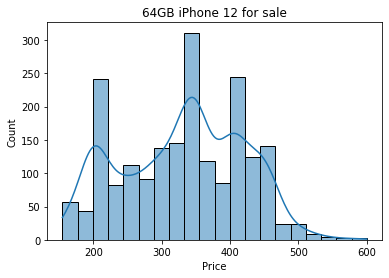

In [63]:
import seaborn as sns
sns.histplot(data=df5_64GB['Price'], kde=True).set(title = '64GB iPhone 12 for sale')

[Text(0.5, 1.0, '128GB iPhone 12 for sale')]

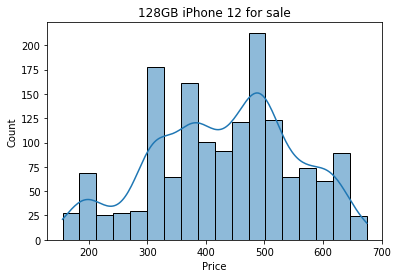

In [65]:
sns.histplot(data=df5_128GB['Price'], kde=True).set(title = '128GB iPhone 12 for sale')

[Text(0.5, 1.0, '256GB iPhone 12 for sale')]

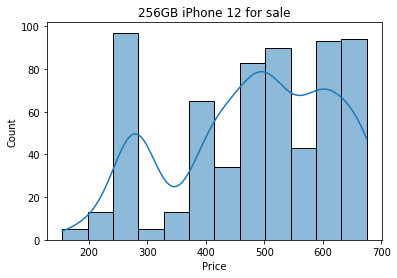

In [64]:
sns.histplot(data=df5_256GB['Price'], kde=True).set(title = '256GB iPhone 12 for sale')

Now we at least have a nice early sense of some of the behaviour of the data we can look at some of our earlier questions: 

In [66]:
# 1. What is the typical cost of a specific kind of iPhone? 
df5.Price.mean()

402.74899718082963

The mean price for an iPhone 12 sold in the last couple of months at auction is £402.75. However as we will see this does seem to depend a lot on some other factors

In [67]:
# 2. What is the variation around this price? 
df5.Price.std()

125.59121370237587

The standard deviation for this value is actually pretty large. This is not surprising because these auctions will include new as well as used phones and will include phones with different amounts of storage. Furthermore some phones will have been unlocked and some will not. All of these factors are likely to be important in determining the value of the phone eventually. 

It is probably worth noting that, at the sampling level we have achieved here the total distribution of prices doesn't look that normal:

[Text(0.5, 1.0, 'All iPhone 12 for sale')]

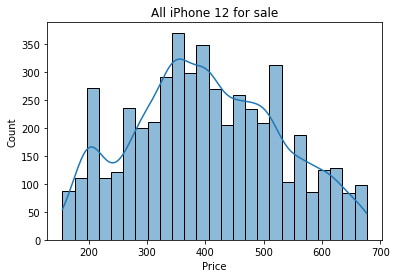

In [69]:
sns.histplot(data=df5['Price'], kde=True).set(title = 'All iPhone 12 for sale')

Three distinct peaks in this KDE function might indicate some degree of tri-modal behaviour. This would follow as the ohone mainkly comes in 64GB, 128GB and 256GB storage options with a very rare 512GB option which contributes far less than the others. 

#### 3. How quickly does the value of an iPhone fall when new generations are released

#### 4. Is price variance similar across all models


We are now moving into questions that we need to set up multiple scrapes to answer. However we can check whether there is similar variance in pricing among different memory versions of the sample model. Later on we can make a filter to separate used from new, under the assumption that the price of new phones would vary by less than that of old phones. 

In [78]:
dataframes = [df5_64GB, df5_128GB, df5_256GB]
stds = []

for dataframe in dataframes:
    stds.append(dataframe['Price'].std())
    
stds

[88.77334413487269, 120.42748500921071, 132.78626161168586]

This is a pretty nice indication that the standard deviations appear to increase as we move to larger storage versions of the iPhone. This could be a real result but I think is also likely to be because we have more data from the smaller capacity iPhones as there are more of these for sale. 